# Setting up

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

# Setting up a machine learning / deep learning environment

In [ ]:
import tensorflow as tf
with tf.compat.v1.Session() as sess:
   helloworld = tf.constant("Hello World!")
   print(sess.run(helloworld))


b'Hello World!'


In [ ]:
helloworld = tf.constant("Hello World!")
tf.print(helloworld)

Hello World!


# 분류 및 회귀

## k-NN

### 분류 문제  예제

In [ ]:
# 라이브러리를 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# 데이터 로드-아이리스
iris=datasets.load_iris()
X=iris.data
y=iris.target

# 표준화 객체 생성 - 특성 파악을 위한 작업
sd=StandardScaler()

# 특성을 표준화 함 - 특성 파악을 위한 작업
X_standardized=sd.fit_transform(X)

# k=5인 최근적 이웃 모델 생성-꽃받침, 꽃잎
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_standardized, y)

# 시험을 위한 2개의 샘플 생성
observation=[
             [0.75, 0.75, 0.75, 0.75,],
             [1,1,1,1]
]


#  2개의 샘플이 속할 클래스 예측
knn.predict(observation)

array([1, 2])

In [ ]:
# 2개의 샘플이 세 클래스에 속할 확률을 조회

knn.predict_proba(observation)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

### 회귀 문제 예제

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 생성 (임의의 회귀 데이터 생성)
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# 훈련 세트와 테스트 세트로 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-최근접 이웃 회귀 모델 생성
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# 모델을 훈련 세트에 맞춤
knn_regressor.fit(X_train, y_train)

# 모델을 사용하여 테스트 세트에 대한 예측 수행
y_pred = knn_regressor.predict(X_test)

# 예측값과 실제값 사이의 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.5881038103118676


### 최선의 이웃 개수 결정하기

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# KNN 분류기를 만듭니다.
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# 파이프라인을 만듭니다.
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

# 탐색 영역의 후보를 만듭니다.
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# 그리드 서치를 만듭니다.
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=0).fit(features, target)

# 최선의 이웃 개수 (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

### Scikit-learn을 이용한 분류 예제 - Iris Data 분류


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
df = pd.DataFrame(X, columns = iris.feature_names)
print("< Iris Data >")
print("The number of sample data : " + str(len(df)))
print("The number of features of the data : " + str(len(df.columns)))
print("The labels of the data : " + str(np.unique(y)))
df

< Iris Data >
The number of sample data : 150
The number of features of the data : 4
The labels of the data : [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# split whole data set into train set and test set
# test_size : the proportion of the dataset to include in the test split. (0~1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    random_state = 42)

print("The number of train data set : %d " %len(X_train))
print("The number of test data set : %d " %len(X_test))

The number of train data set : 100 
The number of test data set : 50 


In [ ]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


In [ ]:
# perform 10-fold cross validation

# create odd list of k for kNN
myList = list(range(1,50))
neighbors = [ x for x in myList if x % 2 != 0]
print(neighbors)
print("The number of neighbors k is %d" %len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The number of neighbors k is 25


In [ ]:
# empty list that will hold cross validation scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    print("< k = %d >" %k)
    estimator = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("The scores of classification are \n" + str(scores))
    cv_scores.append(scores.mean()) # average error
    print("The average score of scores is %.9f \n" %scores.mean())

< k = 1 >
The scores of classification are 
[1.  0.9 1.  0.8 0.8 1.  1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 3 >
The scores of classification are 
[0.9 1.  1.  0.7 0.9 1.  1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 5 >
The scores of classification are 
[1.  1.  1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 7 >
The scores of classification are 
[1.  0.9 1.  0.7 1.  0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 9 >
The scores of classification are 
[0.9 1.  1.  0.7 1.  0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 11 >
The scores of classification are 
[1.  0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.930000000 

< k = 13 >
The scores of classification are 
[0.9 0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.920000000 

< k = 15 >
The scores of classification are 
[1.  0.9 1.  0.7 0.9 1.  1.  1.  1. 

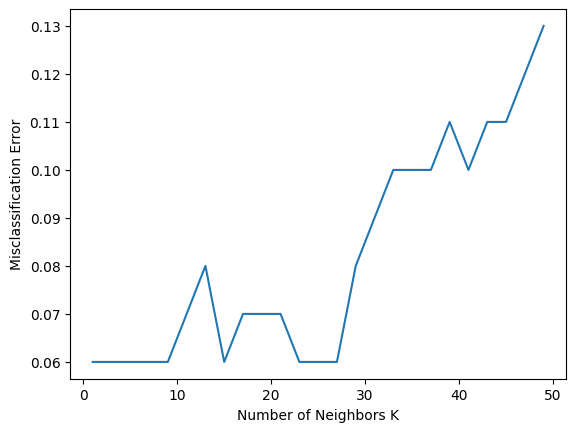

The optimal number of neighbors i is 1


In [ ]:
# changing to misclassification rate (a.k.a classification error)
# MSE = 1 - cross validation score
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# determining best k
min_MSE = min(MSE)
index_of_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_of_min_MSE]
print ("The optimal number of neighbors i is %d" % optimal_k)

In [ ]:
# instantiate learning model (k = 7)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


## 선형 회귀분석- scikit-learn 패키지 사용

In [ ]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

data = {'x1' : [13, 18, 17, 20, 22, 21],
        'x2' : [9, 7, 17, 11, 8, 10],
        'y' : [20, 22, 30, 27, 35, 32]}
data = pd.DataFrame(data)
X = data[['x1', 'x2']]
y = data['y']
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b balue = ', linear_regression.coef_)

a value =  -7.359201773835938
b balue =  [1.5443459  0.62472284]


In [ ]:
residuals = y-prediction
residuals.describe()

count    6.000000e+00
mean     2.368476e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [ ]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.796944017668523


In [ ]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.796944017668523
Mean_Squared_Error =  5.730691056910575
RMSE =  2.3938861829482567


## Noise data와 회귀Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
x =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
dfX =x[['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE']]
dfX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2
...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3


In [ ]:
dfy = pd.DataFrame(target, columns=['MEDV'])

dfy

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,11.9


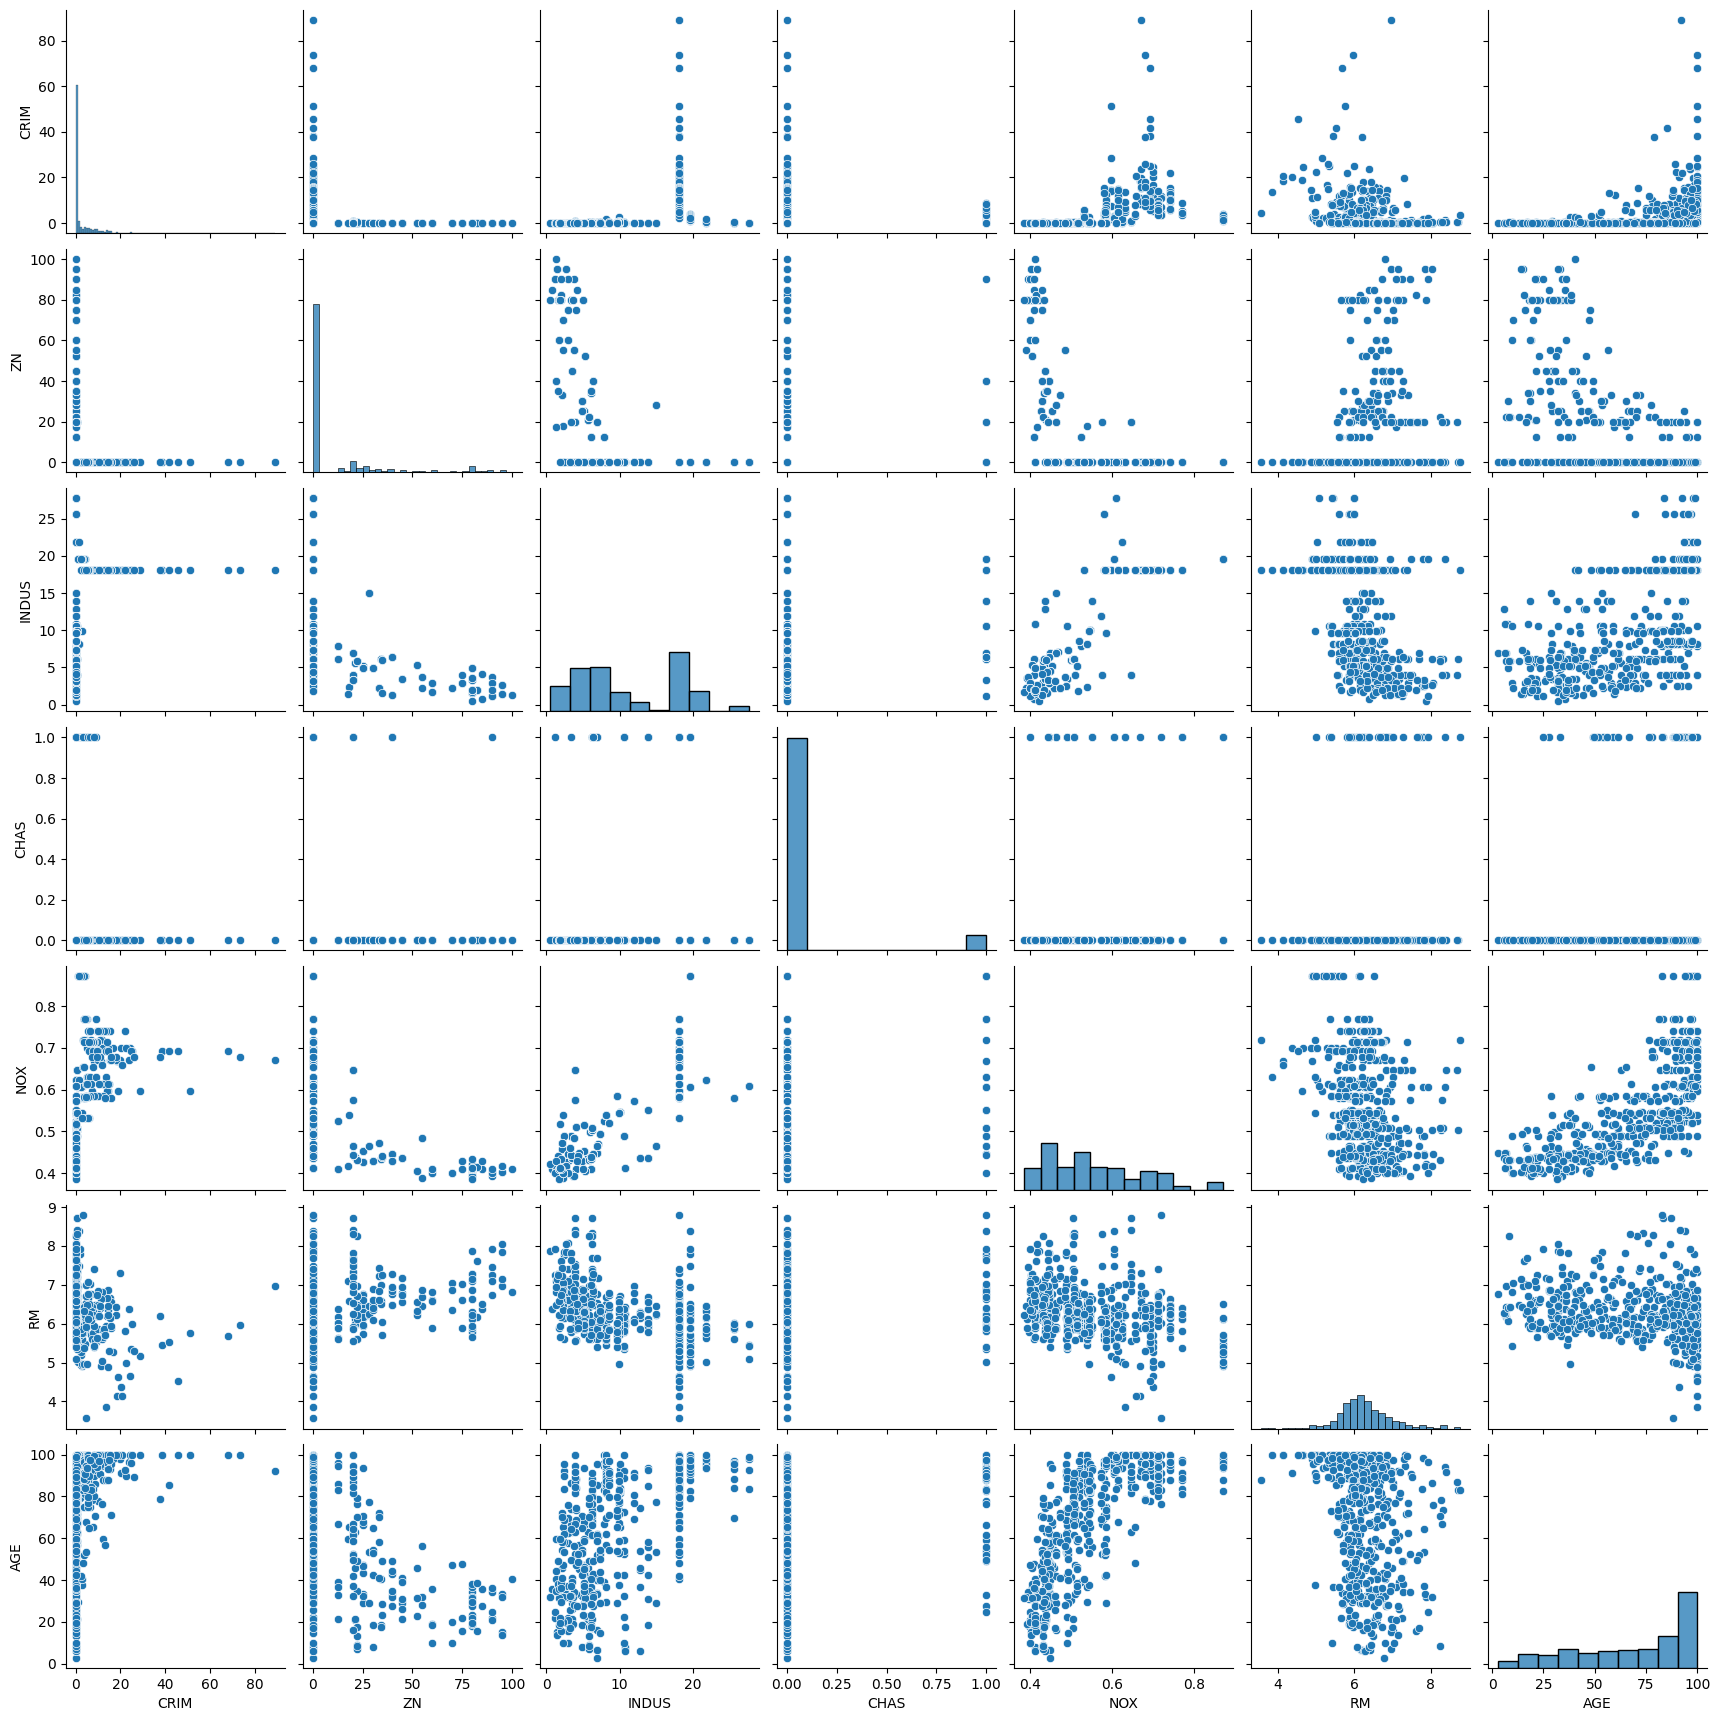

In [ ]:
sns.pairplot(dfX)
plt.show()

# Q 당뇨병 진행도 예측
```

scikit-learn 패키지가 제공하는 당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.
이 데이터의 독립변수를 조사하고 어떤 데이터들이 주택가격과 상관관계가 있는지를 조사한다. 또한 서로 강한 상관관계를 가지는 독립변수도 알아보자.
10 종류의 독립변수를 가지고 있다. 독립변수의 값들은 모두 스케일링(scaling)되었다.
age: 나이
sex: 성별
bmi: BMI(Body mass index)지수
bp: 평균혈압
s1~s6: 6종류의 혈액검사수치
종속변수는 1년 뒤 측정한 당뇨
```의 진행률이다.


In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


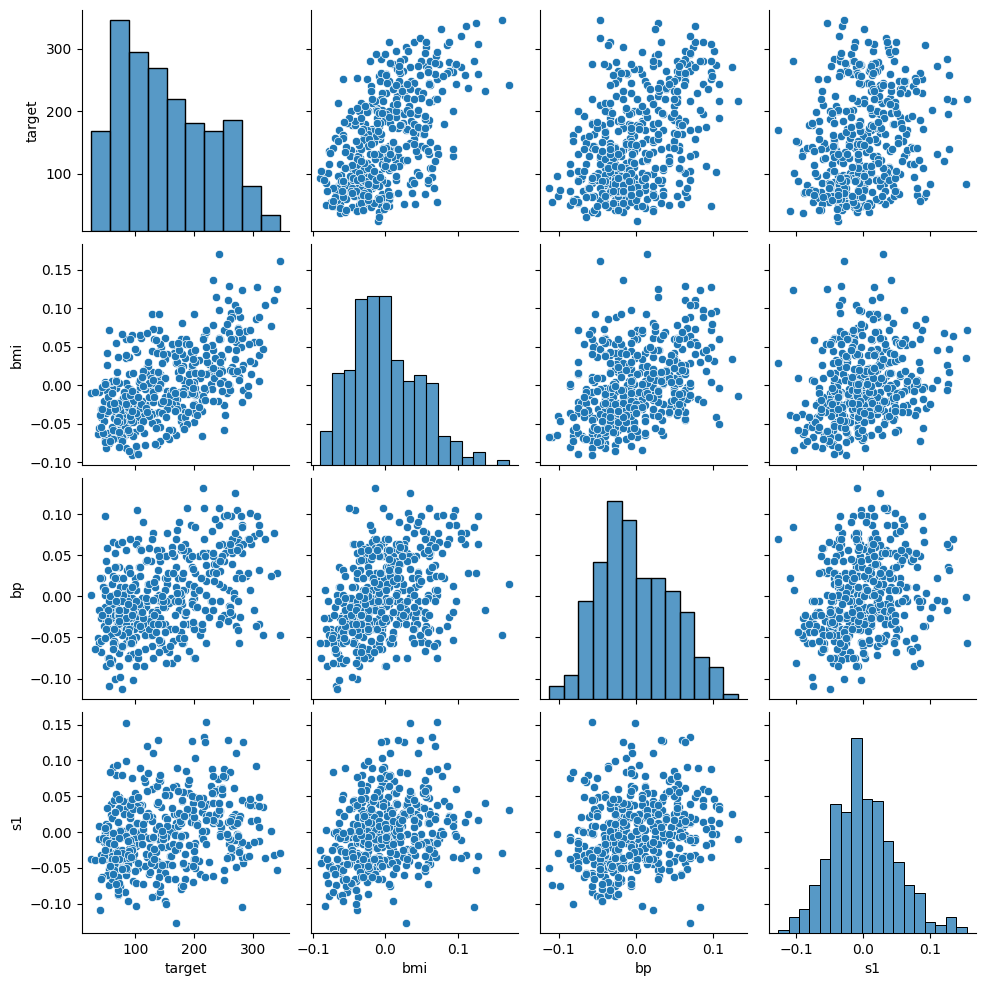

In [ ]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

## 붓꽃 예측

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
#데이터셋
input_data = data['data'] # 꽃의  특징 (input data)
target_data = data['target'] #꽃  종류를  수치로 나탄내  것 (0 ~ 2) (target data)
flowers = data['target_names'] # 꽃  종류를  이름으로  나타낸  것
feature_names = data['feature_names'] # 꽃  특징들의  명칭
#sepal : 꽃받침
#petal : 꽃잎
print('꽃을  결정짓는  특징 :   {}'.format(feature_names))
print('꽃  종류 :   {}'.format(flowers))

꽃을  결정짓는  특징 :   ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃  종류 :   ['setosa' 'versicolor' 'virginica']


In [ ]:
iris_df = pd.DataFrame(input_data, columns=feature_names)
iris_df['species'] = target_data
#맨  위에  있는  데이터 10개  출력
print(iris_df.head(10))
#데이터의  정보  출력
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  


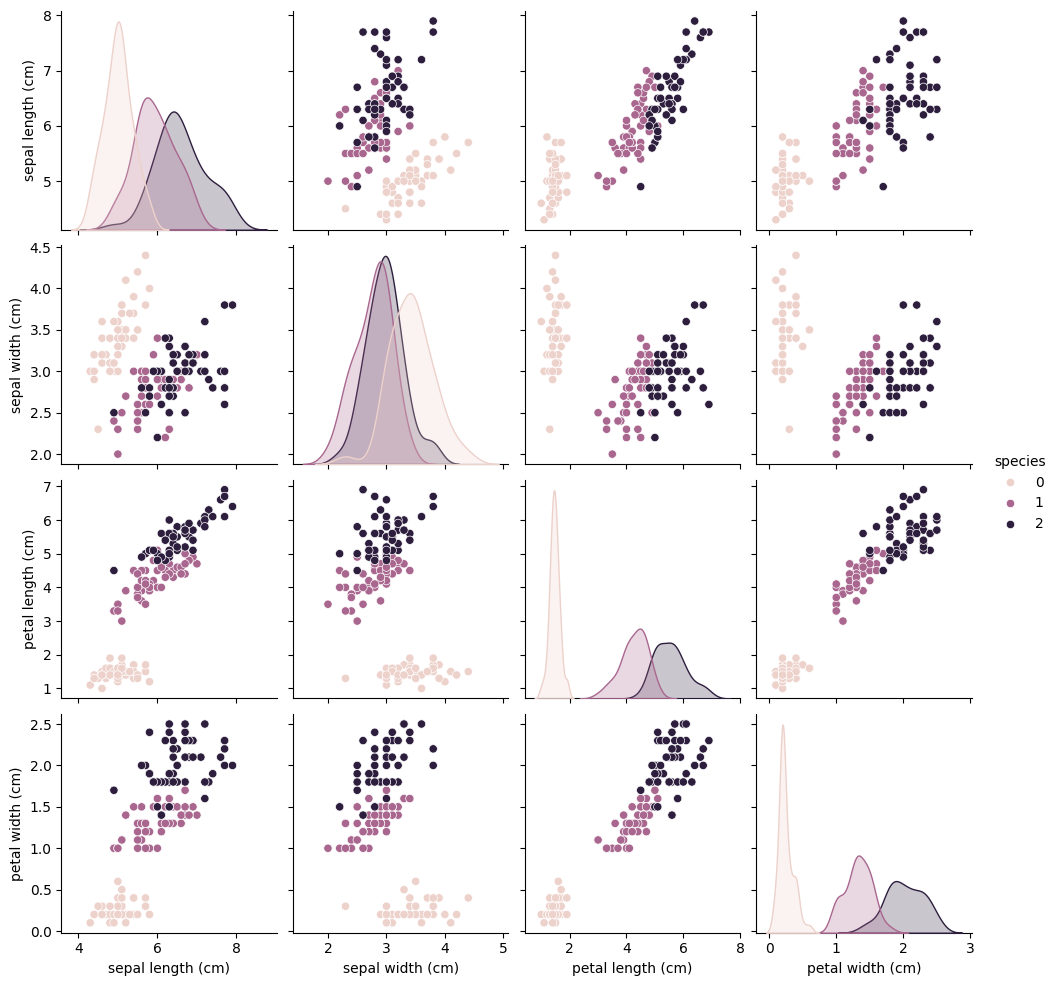

In [ ]:
#4가지 변수(특징)의 관계를 'seaborn' 라이브러리에서 제공하는 pairplot() 메소드로 표현한 그래프 16가지

sns.pairplot(iris_df, hue='species', vars=feature_names)
plt.show()

In [ ]:
#훈련  데이터와  테스트  데이터  분리
train_input, test_input, train_target, test_target = train_test_split(
    input_data, target_data, random_state=42)
#표준점수로  데이터  스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

In [ ]:
lr = LogisticRegression(max_iter=1000)
#로지스틱  회귀  학습
lr.fit(train_scaled, train_target)
#테스트  데이터  예측
pred = lr.predict(test_scaled[:5])
print(pred)

[1 0 2 1 1]


In [ ]:
#각 특징들의 가중치(weight)와 절편(bias)을 확인

#로지스틱  회귀  모델의  가중치와  절편
#다중  분류  가중치와  절편을  출력하면, 각  클래스마다의  가중치  절편을  출력한다.
print(lr.coef_, lr.intercept_)

[[-0.97449266  1.08880261 -1.78283907 -1.65251435]
 [ 0.5069819  -0.30313907 -0.3284927  -0.69092592]
 [ 0.46751076 -0.78566354  2.11133177  2.34344027]] [-0.39090416  1.92359793 -1.53269377]


In [ ]:
setosa_z1 = (-0.96 * 5.1) + (1.09 * 3.5) + (-1.78 * 1.4) + (-1.66 * 0.2) - 0.39
versicolor_z2 = (0.51 * 5.1) + (-0.30 * 3.5) + (-0.32 * 1.4) + (-0.7 * 0.2) - 1.92
virginica_z3 = (0.47 * 5.1) + (-0.79 * 3.5) + (2.11 * 1.4) + (2.34 * 0.2) - 1.53
print(setosa_z1)
print(versicolor_z2)
print(virginica_z3)

setosa_rs=setosa_z1/(setosa_z1+versicolor_z2+virginica_z3)
versicolor_rs=versicolor_z2/(setosa_z1+versicolor_z2+virginica_z3)
virginica_rs=virginica_z3/(setosa_z1+versicolor_z2+virginica_z3)
print(setosa_rs)
print(versicolor_rs)
print(virginica_rs)

-4.294999999999999
-0.957
1.5239999999999994
1.1520922746781115
0.25670600858369097
-0.40879828326180245


In [ ]:
#decision_function()에 테스트 데이터 5개를 넣고 소수점 2자리까지 출력
#결정  함수(decision_function)로 z1 ~ z3의  값을  구한다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-2.2   2.1   0.1 ]
 [ 5.87  2.56 -8.43]
 [-9.33  1.8   7.53]
 [-2.29  1.73  0.56]
 [-3.59  2.33  1.25]]


In [ ]:
#소프트맥스 함수를 사용한 각 클래스들의 확률
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.012 0.87  0.118]
 [0.965 0.035 0.   ]
 [0.    0.003 0.997]
 [0.013 0.752 0.234]
 [0.002 0.745 0.253]]


## 나이브 베이즈(Naive Bayes) 기법

## 예제를 이용한 Naive Bayes Python 코드 실습

In [ ]:
import pandas as pd
import numpy as np

tennis_data = pd.read_csv('datasets/playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

C:\Users\k8s\AppData\Local\Temp\ipykernel_7220\191795039.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)
C:\Users\k8s\AppData\Local\Temp\ipykernel_7220\191795039.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)
C:\Users\k8s\AppData\Local\Temp\ipykernel_7220\191795039.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [ ]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print('X_train :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_train : [[2 4 6 8]
 [1 5 7 9]
 [1 4 6 9]
 [0 3 6 8]
 [1 3 6 8]
 [2 5 7 8]
 [1 3 7 8]
 [2 4 7 8]
 [0 4 7 9]
 [0 4 6 8]]
X_test : [[2 5 7 9]
 [0 3 6 9]
 [0 5 7 8]
 [2 4 6 9]]
y_train : [[11]
 [11]
 [11]
 [10]
 [11]
 [11]
 [11]
 [11]
 [11]
 [10]]
y_test : [[10]
 [10]
 [11]
 [10]]


In [ ]:
gnb_clf = GaussianNB()
gnb_clf = gnb_clf.fit(X_train, y_train)

c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gnb_prediction = gnb_clf.predict(X_test)

In [ ]:
print(gnb_prediction)

[11 11 11 11]


In [ ]:
'''
Naive Bayes 모델의 predict함수를 사용해 X_test 데이터에 대한 예측값과 실제값 y_test를 비교해 모델의 성능을 평가하겠습니다.

성능 평가에 사용될 평가 요소는 confusion_matrix, classification_report, f1_score, accuracy_score입니다.
성능 평가를 하기 위해 sklearn.metrics 패키지의 confusion_matrix, classification_report, f1_score, accuracy_score 모듈을 import합니다.
'''

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
'''
Confusion Matrix는 오차행렬을 나타냅니다. Confusion Matrix의 결과를 보면 2x2 행렬인 것을 알 수 있습니다.
Confusion Matrix의 y축은 실제값, x축은 예측값입니다.
'''

print('Confusion Matrix')
print(confusion_matrix(y_test, gnb_prediction))

Confusion Matrix
[[0 3]
 [0 1]]


In [ ]:
'''
Classification Report는 분류에 대한 측정 항목을 보여주는 보고서를 나타냅니다.

Classification Report의 측정 항목으로는 클래스 별의 precision, recall, f1-score와
전체 데이터의 precision, recall, f1-score가 있습니다.
'''

print('Classification Report')
print(classification_report(y_test, gnb_prediction))

Classification Report
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         3
          11       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 실제값과 예측값에 f1-score함수를 사용해 구한 f-measure와 accuracy_score 함수를 사용해 구한 accuracy를 나타내보겠습니다.


'''
f1_score 함수에 파라미터로 실제값 y_test와 예측값 gnb_prediction을 넣고 average를 weighted로 설정합니다.
weighted는 클래스별로 가중치를 적용하는 역할을 합니다. 이렇게 3개의 파라미터를 넣고 f1_score를 구한 후
round 함수를 이용해 소수점 2번째 자리까지 표현한 값을 변수 fmeasure에 저장합니다.
'''
fmeasure = round(f1_score(y_test, gnb_prediction, average = 'weighted'), 2)


'''
accuracy_score 함수에 파라미터로 실제값 y_test와 예측값 gnb_prediction을 넣고 normalize를 True로 설정합니다.
True는 정확도를 계산해서 출력해주는 역할을 합니다. False로 설정하게 되면 올바르게 분류된 데이터의 수를 출력합니다.
이렇게 3개의 파라미터를 넣고 accuracy를 구한 후 round 함수를 이용해 소수점 2번째 자리까지 표현한 값을 변수 accuracy에 저장합니다.
'''
accuracy = round(accuracy_score(y_test, gnb_prediction, normalize = True), 2)

# 컬럼이 Classifier, F-Measure, Accuracy인 데이터프레임을 변수 df_nbclf에 저장합니다.
df_nbclf = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])

In [ ]:
'''
컬럼 Classifier에는 Naive Bayes로 저장하고, 데이터프레임 df_nbclf에 loc 함수를 사용해
컬럼에 맞게 fmeasure 데이터와 accuracy 데이터를 데이터프레임에 저장합니다.
'''
df_nbclf.loc[len(df_nbclf)] = ['Naive Bayes', fmeasure, accuracy]


# 저장한 데이터프레임을 출력합니다.
df_nbclf

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.1,0.25


## 로지스틱 함수 (logistic function)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

In [ ]:
b_cancer_df['diagnosis']= b_cancer.target

In [ ]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print('유방암 진단 데이터셋 크기: ', b_cancer_df.shape)

유방암 진단 데이터셋 크기:  (569, 31)


In [ ]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

print(b_cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [ ]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#로지스틱 회귀 분석: (1) 모델 생성
lr_b_cancer = LogisticRegression()

#로지스틱 회귀 분석: (2) 모델 훈련
lr_b_cancer.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#로지스틱 회귀 분석: (3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#오차 행렬
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]])

In [ ]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982


In [ ]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


## 의사결정트리 기법

In [ ]:
import pandas as pd

df =  pd.read_csv('datasets/titanic_sns.csv')
df.head()

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
feature_names = ["pclass", "age", "Gender"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,Gender
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [ ]:
from sklearn.preprocessing import LabelEncoder
dfX["Gender"] = LabelEncoder().fit_transform(dfX["Gender"])
dfX.tail()

,pclass,age,Gender
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [ ]:
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

C:\Users\k8s\AppData\Local\Temp\ipykernel_7220\782825513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfX["age"].fillna(dfX["age"].mean(), inplace=True)


,pclass,age,Gender
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,Gender,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


# Ensemble Learning

## 배깅(Bagging)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("datasets/kc-house-data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
nCar=data.shape[0]
nVar=data.shape[1]
print(nCar, nVar)

21613 21


In [ ]:
data=data.drop(['id','date','zipcode','lat','long'],axis=1)

In [ ]:
feature_columns=list(data.columns.difference(['price']))
X=data[feature_columns]
y=data['price']

In [ ]:
X

,bathrooms,bedrooms,condition,floors,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated
0,1.00,3,3,1.0,7,1180,0,1180,1340,5650,5650,0,0,1955,0
1,2.25,3,3,2.0,7,2170,400,2570,1690,7242,7639,0,0,1951,1991
2,1.00,2,3,1.0,6,770,0,770,2720,10000,8062,0,0,1933,0
3,3.00,4,5,1.0,7,1050,910,1960,1360,5000,5000,0,0,1965,0
4,2.00,3,3,1.0,8,1680,0,1680,1800,8080,7503,0,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,3,3,3.0,8,1530,0,1530,1530,1131,1509,0,0,2009,0
21609,2.50,4,3,2.0,8,2310,0,2310,1830,5813,7200,0,0,2014,0
21610,0.75,2,3,2.0,7,1020,0,1020,1020,1350,2007,0,0,2009,0
21611,2.50,3,3,2.0,8,1600,0,1600,1410,2388,1287,0,0,2004,0


In [ ]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(15129, 15) (6484, 15) (15129,) (6484,)


In [ ]:
# 라이브러리 임포트
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
# 선형회귀모델생성
regression_model=LinearRegression()
# 훈련
linear_model1=regression_model.fit(train_x, train_y)
# 예측
predict1=linear_model1.predict(test_x)
# 결과 인쇄
print('RMSE: {}'.format(math.sqrt(mean_squared_error(predict1, test_y))))

RMSE: 223893.60561815818


## Random Forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

#loading the iris dataset
iris = load_iris()

#training data 설정
x_train = iris.data[:-30]
y_train = iris.target[:-30]
#test data 설정
x_test = iris.data[-30:] # test feature data
y_test = iris.target[-30:] # test target data

print(y_train)

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
#RandomForestClassifier libary를 import
from sklearn.ensemble import RandomForestClassifier
#tree 의 개수 Random Forest 분류 모듈 생성
rfc = RandomForestClassifier(n_estimators=10)
rfc

RandomForestClassifier(n_estimators=10)

In [ ]:
rfc.fit(x_train, y_train)
#Test data를 입력해 target data를 예측
prediction = rfc.predict(x_test)
#예측 결과 precision과 실제 test data의 target 을 비교
print (prediction==y_test)

[ True  True  True False  True  True False False  True False  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


In [ ]:
#Random forest 정확도 츶정
rfc.score(x_test, y_test)

0.7666666666666667

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print ("Accuracy is : ",accuracy_score(prediction, y_test))
print ("=======================================================")
print (classification_report(prediction, y_test))

Accuracy is :  0.7666666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.77      1.00      0.87        23

    accuracy                           0.77        30
   macro avg       0.38      0.50      0.43        30
weighted avg       0.59      0.77      0.67        30



c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
print (y_test)
print (Y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 0 0 0 0 1 2 2 0 2 0 2 2 1 2 2 1 0 2 0 1 2 2 2 0 0 0 0 1 1]


In [ ]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)
prediction_1 = rfc.predict(X_test)
#print (prediction_1 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_1, Y_test))
print ("=======================================================")
print (classification_report(prediction_1, Y_test))

Accuracy is :  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
# Initialize the model
clf_2 = RandomForestClassifier(n_estimators=200, # Number of trees
                               max_features=4,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*
clf_2.fit(X_train, Y_train)
prediction_2 = clf_2.predict(X_test)
print (prediction_2 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_2, Y_test))
print ("=======================================================")
print (classification_report(prediction_2, Y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True False
  True  True  True  True  True False]
Accuracy is :  0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.75      0.80         8
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.89      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
for feature, imp in zip(iris.feature_names, clf_2.feature_importances_):
    print(feature, imp)

sepal length (cm) 0.00839928162795798
sepal width (cm) 0.0020454906372119456
petal length (cm) 0.30994978257041755
petal width (cm) 0.6796054451644125


### 특성 중요도

In [ ]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


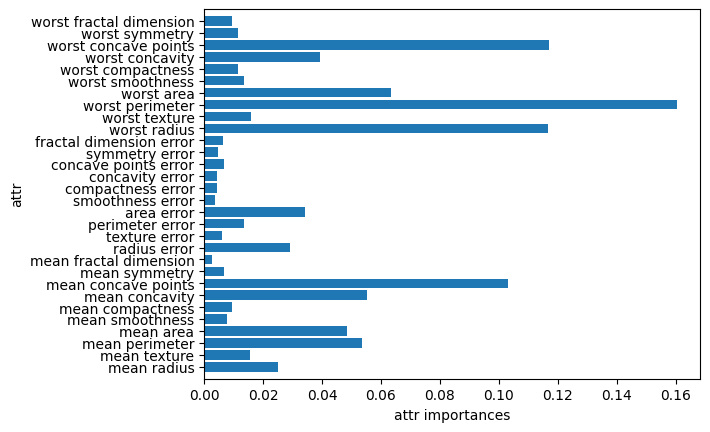

In [ ]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plt.show()

plot_feature_importances_cancer(forest)

## Boosting

### AdaBoost 사용해 보기

In [ ]:
# 1. 에이다 부스트
# 라이브러리 임포트
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
adaboost=AdaBoostClassifier(random_state=0)
# 훈련
rs_ada=adaboost.fit(data, target)
rs_ada.feature_importances_

array([0.        , 0.05832968, 0.36761435, 0.57405598])

### Gradient Boost(GBM) 사용해 보기


In [ ]:
# 라이브러리 임포트
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
gradientboost=GradientBoostingClassifier(random_state=0)
# 훈련
rs_gb=gradientboost.fit(data, target)
rs_gb.feature_importances_

array([0.00637865, 0.01241147, 0.30658526, 0.67462463])

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

# 훈련 세트 정확도 : 1.000
# 테스트 세트 정확도 : 0.958
# 훈련 세트의 정확도가 100%이므로 과대적합되었다.
# 과대적합을 막기위해 사전 가지치기를 합니다.

gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [ ]:
# 과대적합을 막기위해 학습률을 낮춘다

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.958


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 훈련 세트의 정확도가 100%이므로 과대적합되었다.
# 과대적합을 막기위해 사전 가지치기를 합니다.
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

# 훈련 세트 정확도 : 0.991
# 테스트 세트 정확도 : 0.972
# 특성 중요도

print("특성 중요도 : \n{}".format(gbrt.feature_importances_))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.00000000e+00 9.07529959e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.32035766e-03 2.65686907e-01
 3.49588341e-04 0.00000000e+00 0.00000000e+00 3.00083378e-04
 0.00000000e+00 1.45838255e-02 1.05083243e-03 0.00000000e+00
 4.75469106e-03 0.00000000e+00 9.56890421e-04 0.00000000e+00
 9.23939383e-03 1.61819935e-02 3.22495788e-01 9.24249926e-02
 6.44041105e-03 0.00000000e+00 6.85101108e-03 2.31450675e-01
 6.41500790e-03 3.42225071e-03]


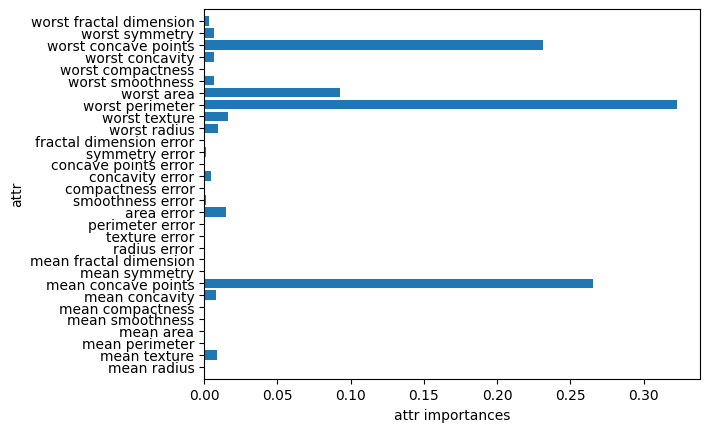

In [ ]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plt.show()

plot_feature_importances_cancer(gbrt)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

# 지도_수치 예측

## SVM(Support Vector Machine)

### Scikit-Learn의 서포트 벡터 머신

c:\DEV\envs\py3_10_tf\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\envs\py3_10_tf\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\envs\py3_10_tf\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\envs\py3_10_tf\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\envs\py3_10_tf\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV

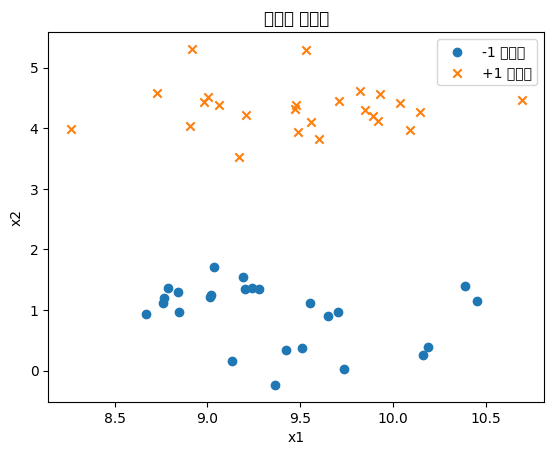

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [2]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]
classifier.fit(training_points, labels)

SVC(kernel='linear')

In [3]:
print(classifier.predict([[3, 2]]))

[1]


In [4]:
print(classifier.support_vectors_)

[[7. 5.]
 [8. 2.]
 [2. 2.]]


In [5]:
print("학습 데이터 점수: {}".format(classifier.score(training_points , labels )))

학습 데이터 점수: 1.0


## 붓꽃 문제에의 응용


In [6]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [7]:
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mp.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)

C:\Users\k8s\AppData\Local\Temp\ipykernel_7336\3829703612.py:11: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\k8s\AppData\Local\Temp\ipykernel_7336\3829703612.py:11: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\k8s\AppData\Local\Temp\ipykernel_7336\3829703612.py:11: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\k8s\AppData\Local\Temp\ipykernel_7336\3829703612.py:11: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\k8s\AppData\Local\Temp\ipykernel_7336\3829703612.py:11: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\k8s\AppData\Local\Temp\ipykernel_7336\3829703612.py:11: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans

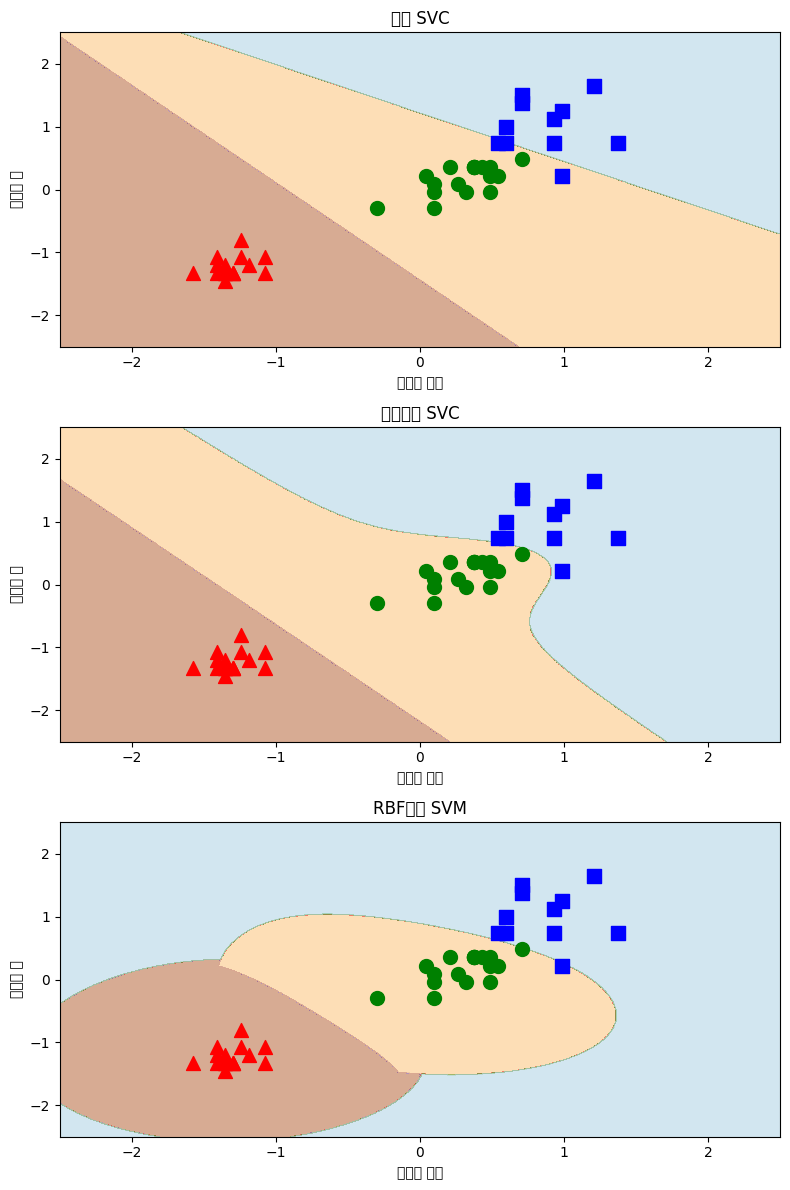

In [8]:
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()


### 인공 신경망 분석

In [9]:
# sklearn의 datasets에서 load_iris를 로드
from sklearn.datasets import load_iris
# iris데이터셋을 iris라는 변수에 저장
iris = load_iris()

# iris에 있는 key값을 나타냄
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
# iris의 데이터에 해당하는 부분의 X와 Y의 크기를 나타냄
iris['data'].shape

(150, 4)

In [11]:
# iris데이터셋의 0번째부터 9번째까지를 슬라이싱해서 나타냄
iris['data'][0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [12]:
# X에는 iris데이터의 값 150x4의 크기를 입력
# y에는 분류하고자 하는 target변수를 입력
# target변수는 데이터가 무엇인지에 대해 판별하는 값
# iris target의 경우 0, 1, 2로 구분됨
X = iris['data']
y = iris['target']

# 위의 데이터를 train과 test로 구분
# sklearn의 model_selection 내에 train_test_split를 로드
# train_test_split를 이용해 위의 X변수에 선언한 data값과 y변수에 선언한 target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# sklearn 내에 preprocessing의 StandardScaler를 로드
# StandardScaler는 정규화를 시키는 함수
# StandardScaler는 데이터의 범위를 평균 0, 표준편차 1의 범위로 바꿔주는 함수
# 그리고 StandardScaler를 scaler라는 변수에 저장해 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# StandardScaler를 담은 변수에 X_train을 학습해 데이터를 정규화
scaler.fit(X_train)

# X_train과 X_test를 StandardScaler를 이용해 정규화
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# 다중인공신경망(MLP) 분류 알고리즘을 sklearn의 neural_network에서 로드
from sklearn.neural_network import MLPClassifier

# MLP 알고리즘의 히든레이어를 3계층(10,10,10)으로 할당
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))

In [15]:
# 위에서 분류한 X_train과 y_train을 MLP를 이용해 학습
mlp.fit(X_train, y_train)

# mlp로 학습한 내용을 X_test에 대해 예측하여 predictions변수에 저장
predictions = mlp.predict(X_test)

# sklearn.metrics의 confusion_matrix와 classification_report를 로드
# confusion_matrix는 데이터가 맞는지의 유무를 판단
# classification_report는 precision과 recall 그리고 f1_score등을 계산해 정확률에 대해 계산
from sklearn.metrics import classification_report, confusion_matrix

# confusion_matrix를 이용해 실제값 y_test와 예측값에 대해 비교
print(confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]


c:\DEV\envs\py3_10_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# classification_report를 이용해 정확률, 재현율, f1-score를 확인  
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

